In [110]:
import pandas as pd
df = pd.read_csv(r'C:\Users\pbeal\OneDrive\Documentos\GitHub\ENS5172_20241\tabelas\dados_trabalho01.csv', encoding='ISO-8859-1')

df

,Fonte,PM,PM10,"PM2,5",NOX,SO2,CO,VOC
0,Chaminés,45.34,29.25,19.17,104.09,280.37,"3,506.15",6.12
1,Erosão Eólica - Pilhas,1.15,0.57,0.09,-,-,-,-
2,Fugitivas,0.44,1.04,0.18,0.04,1.01,0.55,22.25
3,Máquinas/Equipamentos,0.19,0.19,0.19,3.98,"<0,01",1.4,0.45
4,Navios,3.04,3.04,3.04,26.73,23.3,3.11,2.91
5,Tanques,-,-,-,-,-,-,<0.01
6,Transferências,8.54,2.25,0.37,-,-,-,-
7,Vias,14.96,2.99,0.68,0.36,0.01,0.12,0.06
8,TOTAL,73.65,39.34,23.72,135.19,304.7,"3,511.33",31.8


In [152]:
#Taxa esta determinada em kg/h
import numpy as np
import pandas as pd

def criar_variabilidade_taxa_atividade(sazonalidade, amplitude, desvio_padrao_ruido, tamanho_amostra):
    # Criar sazonalidade mensal baseada nos dados de 2023
    sazonalidade_mensal = [0.9, 0.85, 0.95, 1.1, 1.2, 1.25, 1.3, 1.35, 1.4, 1.35, 1.2, 1.1]

    # Replicar a sazonalidade para o tamanho da amostra
    sazonalidade_amostra = np.tile(sazonalidade_mensal, tamanho_amostra // 12 + 1)[:tamanho_amostra]

    # Gerar ruído aleatório : ruído aleatório é um dos três componentes principais, juntamente com a deriva e a variação espacialmente correlacionada, que contribuem para a alteração no valor de uma variável sobre uma superfície
    ruido_aleatorio = np.random.normal(scale=desvio_padrao_ruido, size=tamanho_amostra)

    # Multiplicar a sazonalidade pelo fator de amplitude e adicionar o ruído aleatório
    taxa_atividade = sazonalidade_amostra * amplitude + ruido_aleatorio

    return taxa_atividade

# Exemplo de uso da função
sazonalidade = 1  # Fator de sazonalidade base
amplitude = 20  # Amplitude da variação sazonal
desvio_padrao_ruido = 5  # Desvio padrão do ruído aleatório
tamanho_amostra = 365  # Tamanho da amostra (um ano)

taxa_atividade = criar_variabilidade_taxa_atividade(sazonalidade, amplitude, desvio_padrao_ruido, tamanho_amostra)

# Criar DataFrame para visualização dos dados
datas = pd.date_range(start='2023-01-01', end='2023-12-31')
df = pd.DataFrame({'Data': datas, 'Taxa Atividade': taxa_atividade})

# Visualizar os dados
df

,Data,Taxa Atividade
0,2023-01-01,18.549466
1,2023-01-02,21.267864
2,2023-01-03,13.940043
3,2023-01-04,24.492301
4,2023-01-05,14.461192
...,...,...
360,2023-12-27,18.233060
361,2023-12-28,27.709105
362,2023-12-29,15.767575
363,2023-12-30,19.655305


In [236]:
df.iloc[:,0]


0      2023-01-01 00:00:00
1      2023-01-01 01:00:00
2      2023-01-01 02:00:00
3      2023-01-01 03:00:00
4      2023-01-01 04:00:00
               ...        
8732   2023-12-30 20:00:00
8733   2023-12-30 21:00:00
8734   2023-12-30 22:00:00
8735   2023-12-30 23:00:00
8736   2023-12-31 00:00:00
Name: Data, Length: 8737, dtype: datetime64[ns]

In [295]:
import numpy as np
import pandas as pd

def criar_variabilidade_atividade():
    # Gerar datas para um ano
    datas = pd.date_range(start='2023-01-01', end='2023-12-31', freq='h')  # Frequência horária

    # Componente sazonal mensal
    sazonalidade_mensal = (
        (np.sin(2 * np.pi * datas.month / 12) + 1) / 2 +  # Componente seno
        (np.cos(2 * np.pi * datas.month / 12) + 1) / 2    # Componente cosseno
    ) / 2


 # Método de Monte Carlo para variações aleatórias diárias
    desvio_padrao_diario = 15  # Desvio padrão para variação diária
    variabilidade_diaria_kg_por_h = np.random.normal(loc=0, scale=desvio_padrao_diario, size=len(datas))
    # Garantindo que os valores não sejam negativos
    variabilidade_diaria_kg_por_h = np.maximum(variabilidade_diaria_kg_por_h, 0)
    # Conversão de kg/h para g/s
    taxa_kg_por_h_para_g_por_s = variabilidade_diaria_kg_por_h * (1000 / 3600)

    # Combinação da sazonalidade mensal e variações diárias
    variabilidade_atividade_g_por_s = sazonalidade_mensal + taxa_kg_por_h_para_g_por_s

    return variabilidade_atividade_g_por_s

# Criar DataFrame para visualização dos dados
datas = pd.date_range(start='2023-01-01', end='2023-12-31', freq='h')  # Frequência horária
atividade_empreendimento = criar_variabilidade_atividade()

df = pd.DataFrame({'Data': datas, 'Taxa de Atividade (g/s)': atividade_empreendimento})
df.iloc[:,0]

df


,Data,Taxa de Atividade (g/s)
0,2023-01-01 00:00:00,9.376887
1,2023-01-01 01:00:00,7.743193
2,2023-01-01 02:00:00,4.595792
3,2023-01-01 03:00:00,2.612093
4,2023-01-01 04:00:00,4.173308
...,...,...
8732,2023-12-30 20:00:00,4.417867
8733,2023-12-30 21:00:00,0.750000
8734,2023-12-30 22:00:00,1.063894
8735,2023-12-30 23:00:00,0.750000


In [298]:

df['Ano'] = df['Data'].dt.year
df['Mês'] = df['Data'].dt.month
df['Dia'] = df['Data'].dt.day

df

,Data,Taxa de Atividade (g/s),Ano,Mês,Dia
0,2023-01-01 00:00:00,9.376887,2023,1,1
1,2023-01-01 01:00:00,7.743193,2023,1,1
2,2023-01-01 02:00:00,4.595792,2023,1,1
3,2023-01-01 03:00:00,2.612093,2023,1,1
4,2023-01-01 04:00:00,4.173308,2023,1,1
...,...,...,...,...,...
8732,2023-12-30 20:00:00,4.417867,2023,12,30
8733,2023-12-30 21:00:00,0.750000,2023,12,30
8734,2023-12-30 22:00:00,1.063894,2023,12,30
8735,2023-12-30 23:00:00,0.750000,2023,12,30


(8737,)


<Axes: >

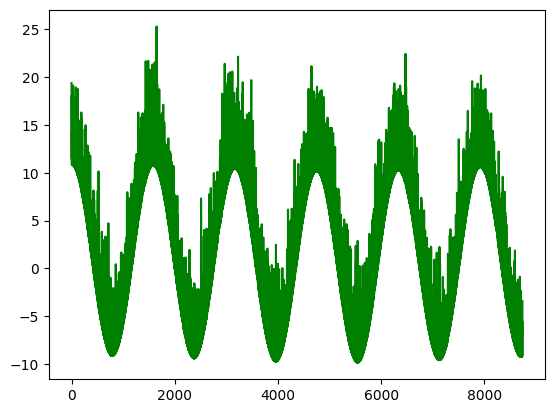

In [330]:
tt = np.arange(0,df.shape[0],1)
print(tt.shape)
df['sazonal'] = (np.cos(tt/(360*0.7)))
df['timeSeries'] = 10*df['sazonal']+df['Taxa de Atividade (g/s)']
#df['sazonal'].plot()
df['timeSeries'].plot(color='green')


In [310]:
df

,Data,Taxa de Atividade (g/s),Ano,Mês,Dia,sazonal,timeSeries
0,2023-01-01 00:00:00,9.376887,2023,1,1,1.000000,19.376887
1,2023-01-01 01:00:00,7.743193,2023,1,1,1.000000,17.743190
2,2023-01-01 02:00:00,4.595792,2023,1,1,0.999999,14.595783
3,2023-01-01 03:00:00,2.612093,2023,1,1,0.999998,12.612071
4,2023-01-01 04:00:00,4.173308,2023,1,1,0.999996,14.173269
...,...,...,...,...,...,...,...
8732,2023-12-30 20:00:00,4.417867,2023,12,30,0.976051,14.178375
8733,2023-12-30 21:00:00,0.750000,2023,12,30,0.976202,10.512016
8734,2023-12-30 22:00:00,1.063894,2023,12,30,0.976352,10.827414
8735,2023-12-30 23:00:00,0.750000,2023,12,30,0.976502,10.515018
